In [8]:
from ase.build import bulk
from ase import Atoms

from typing import Optional, Any

from pyiron_workflow_lammps.engine import LammpsEngine
from pyiron_workflow_atomistics.dataclass_storage import CalcInputMinimize
from pyiron_workflow_atomistics.calculator import calculate_structure_node

from pyiron_workflow_atomistics.bulk import eos_volume_scan
import pyiron_workflow as pwf
from pyiron_workflow import Workflow
from pyiron_workflow_atomistics.bulk import evaluate_structures
from pyiron_workflow_atomistics.dataclass_storage import CalcInputMinimize, CalcInputStatic
from pyiron_workflow_atomistics.gb.optimiser_engine import gb_length_optimiser
import numpy as np

from pyiron_workflow_atomistics.featurisers import distanceMatrixSiteFeaturiser, voronoiSiteFeaturiser
from pyiron_workflow_atomistics.gb.analysis import plot_GB_plane, find_GB_plane
from pyiron_workflow_atomistics.utils import get_working_subdir_kwargs
from pyiron_workflow_atomistics.bulk import optimise_cubic_lattice_parameter
from pyiron_workflow_atomistics.gb.gb_code.constructor import construct_GB_from_GBCode
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# EngineInput = CalcInputMinimize()
# EngineInput.relax_cell = False
# Engine = LammpsEngine(EngineInput = EngineInput)

# Engine.working_directory = "test_eos_volume_scan"
# Engine.command = "/root/github_dev/lammps/build/lmp -in in.lmp -log minimize.log"
# Engine.lammps_log_filepath = "minimize.log"
# Engine.path_to_model = "/root/github_dev/test_workflow_nodes/2025_04_29_FeGB_Segregation_Workflows/final_model"
# Engine.input_script_relax_pressure = 1e4
# Engine.input_script_relax_vmax = 0.001

# structures = [bulk("Fe", cubic=True) * [2,2,2], bulk("Fe", cubic=True) * [2,2,2]]
# wf = Workflow(Engine.working_directory)
# wf.es = evaluate_structures(
#     structures=structures,
#     calculation_engine=Engine,
# )
# from pyiron_workflow_atomistics.calculator import extract_output_values_from_EngineOutput
# wf.structures = extract_output_values_from_EngineOutput(
#         wf.es.outputs.engine_output_lst,
#         key="final_structure",
#     )
# wf.run()

In [4]:
# EngineInput = CalcInputMinimize()
# EngineInput.relax_cell = False
# Engine = LammpsEngine(EngineInput = EngineInput)

# Engine.working_directory = "test_eos_volume_scan"
# Engine.command = "/root/github_dev/lammps/build/lmp -in in.lmp -log minimize.log"
# Engine.lammps_log_filepath = "minimize.log"
# Engine.path_to_model = "/root/github_dev/test_workflow_nodes/2025_04_29_FeGB_Segregation_Workflows/final_model"
# Engine.input_script_relax_pressure = 1e4
# Engine.input_script_relax_vmax = 0.001

# structure = bulk("Fe", a=2.828, cubic=True) * [2,2,2]
# wf1 = Workflow("test_eos_volume_scan")
# wf1.eos = eos_volume_scan(
#     base_structure=structure,
#     calculation_engine=Engine,
#     axes=["a", "b", "c"],
#     strain_range=(-0.02, 0.02),
#     num_points=6,
#     eos_type="birchmurnaghan",
# )

# wf1.run()

In [ ]:
# from copy import deepcopy
# gb_opt_engine = deepcopy(Engine)
# gb_opt_engine.working_directory = "gb_opt_engine"
# gb_opt_engine.command = "/root/github_dev/lammps/build/lmp -in in.lmp -log minimize.log"
# gb_opt_engine.lammps_log_filepath = "minimize.log"
# gb_opt_engine.path_to_model = "/root/github_dev/test_workflow_nodes/2025_04_29_FeGB_Segregation_Workflows/final_model"
# gb_opt_engine.input_script_relax_pressure = 1e4
# gb_opt_engine.input_script_relax_vmax = 0.001
# from pyiron_workflow_atomistics.gb.optimiser_engine import full_gb_length_optimization
# wf1.gb_length_optimiser = full_gb_length_optimization(
#     gb_structure=wf1.gb_structure.outputs.final_structure,
#     calculation_engine=Engine,
#     equil_bulk_volume=wf1.opt_cubic_cell.outputs.equil_volume_per_atom,
#     equil_bulk_energy=wf1.opt_cubic_cell.outputs.equil_energy_per_atom,
#     extensions_stage1=np.linspace(-0.2, 0.8, 3),
#     extensions_stage2=np.linspace(-0.05, 0.05, 5),
#     interpolate_min_n_points=5,
#     gb_normal_axis="c"
# )

calc_fn_kwargs (get_working_subdir_kwargs):
Inputs ['calc_structure_fn_kwargs', 'base_working_directory', 'new_working_directory']
OutputsWithInjection ['dict_with_adjusted_working_directory']
InputSignals ['run', 'accumulate_and_run']
OutputSignals ['ran', 'failed']
EngineInput type: <class 'pyiron_workflow_atomistics.dataclass_storage.CalcInputMinimize'>
mode set to  minimize
current mode  minimize
test_opt_cubic_cell


/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized quantity
  warnings.warn(
/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized quantity
  warnings.warn(
/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized quantity
  warnings.warn(
/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized qu

0
In get_length executing
test_opt_cubic_cell
In get_length executing
test_opt_cubic_cell


/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized quantity
  warnings.warn(
/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized quantity
  warnings.warn(
/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized quantity
  warnings.warn(


In get_gb_length_optimiser_plot executing
test_opt_cubic_cell


/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized quantity
  warnings.warn(
/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized quantity
  warnings.warn(
/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized quantity
  warnings.warn(
/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized qu

In get_gb_length_optimiser_plot executing
In generate_deepcopy executing
In get_gb_length_optimiser_plot executing


{'opt_cubic_cell__equil_struct': Atoms(symbols='Fe2', pbc=True, cell=[2.8281319270161314, 2.8281319270161314, 2.8281319270161314], initial_magmoms=...),
 'opt_cubic_cell__B': 174.6511086675907,
 'opt_cubic_cell__volumes': [21.287097162601995,
  21.81268105404494,
  22.346845717919777,
  22.889660634165235,
  23.441195282719992,
  24.001519143522813],
 'opt_cubic_cell__structures': [Atoms(symbols='Fe2', pbc=True, cell=[[2.77144, 1.6970175625144705e-16, 1.6970175625144705e-16], [0.0, 2.77144, 1.6970175625144705e-16], [0.0, 0.0, 2.77144]]),
  Atoms(symbols='Fe2', pbc=True, cell=[[2.794064, 1.7108707671064253e-16, 1.7108707671064253e-16], [0.0, 2.794064, 1.7108707671064253e-16], [0.0, 0.0, 2.794064]]),
  Atoms(symbols='Fe2', pbc=True, cell=[[2.816688, 1.72472397169838e-16, 1.72472397169838e-16], [0.0, 2.816688, 1.72472397169838e-16], [0.0, 0.0, 2.816688]]),
  Atoms(symbols='Fe2', pbc=True, cell=[[2.839312, 1.7385771762903346e-16, 1.7385771762903346e-16], [0.0, 2.839312, 1.7385771762903348e

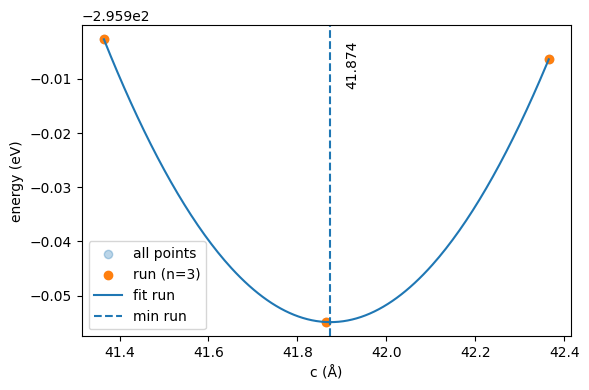

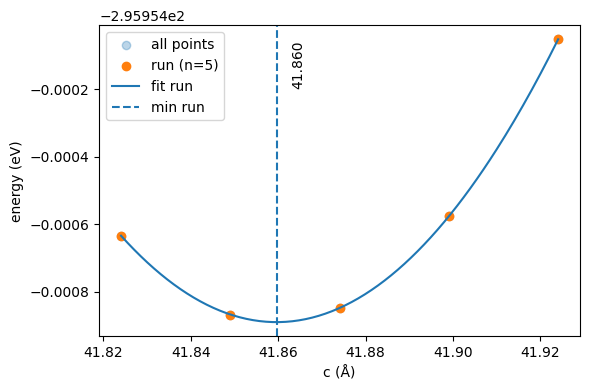

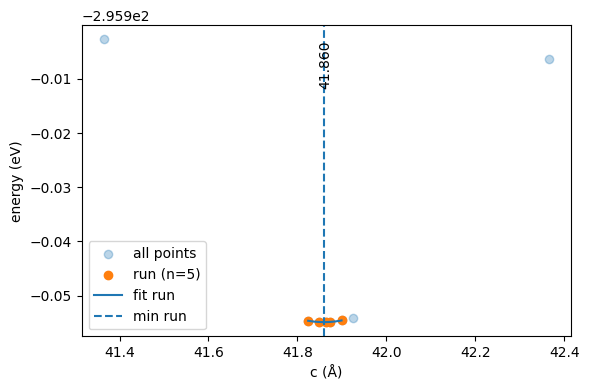

In [ ]:
EngineInput = CalcInputMinimize()
EngineInput.relax_cell = False
Engine = LammpsEngine(EngineInput = EngineInput)

Engine.working_directory = "test_opt_cubic_cell"
Engine.command = "/root/github_dev/lammps/build/lmp -in in.lmp -log minimize.log"
Engine.lammps_log_filepath = "minimize.log"
Engine.path_to_model = "/root/github_dev/test_workflow_nodes/2025_04_29_FeGB_Segregation_Workflows/final_model"
Engine.input_script_relax_pressure = 1e4
Engine.input_script_relax_vmax = 0.001


structure = bulk("Fe", a=2.828, cubic=True)
wf1 = Workflow(Engine.working_directory, delete_existing_savefiles=True)
wf1.opt_cubic_cell = optimise_cubic_lattice_parameter(
    structure=structure,
    name="Fe",
    crystalstructure="bcc",
    calculation_engine=Engine,
    parent_working_directory="opt_cubic_cell",
    rattle=0.1,
    strain_range=(-0.02, 0.02),
    num_points=6,
)
wf1.gb_structure = construct_GB_from_GBCode(
    axis=(1, 1, 1),
    basis="bcc",
    lattice_param=wf1.opt_cubic_cell.outputs.a0,
    m=3,
    n=1,
    GB1=(-1, -1, 2),
    element="Fe",
    req_length_grain=15,
    grain_length_axis=0,
    arrange_ab_by_length=True,
    perform_equiv_check=False,
    merge_dist_tolerance=1.3,
    merge_mode="average",
    equil_volume=wf1.opt_cubic_cell.outputs.equil_volume_per_atom
)
# try:
#     wf1.remove_child("gb_study")
# except:
#     pass
# wf1.failed = False
gb_opt_engine = LammpsEngine(EngineInput=CalcInputMinimize())
gb_opt_engine.working_directory = "pure_gb_study"
gb_opt_engine.command = "/root/github_dev/lammps/build/lmp -in in.lmp -log minimize.log"
gb_opt_engine.lammps_log_filepath = "minimize.log"
gb_opt_engine.path_to_model = "/root/github_dev/test_workflow_nodes/2025_04_29_FeGB_Segregation_Workflows/final_model"
gb_opt_engine.input_script_relax_pressure = 1e4
gb_opt_engine.input_script_relax_vmax = 0.001

gb_opt_engine_static = LammpsEngine(EngineInput=CalcInputStatic())
gb_opt_engine_static.working_directory = "pure_gb_study"
gb_opt_engine_static.command = "/root/github_dev/lammps/build/lmp -in in.lmp -log static.log"
gb_opt_engine_static.lammps_log_filepath = "static.log"
gb_opt_engine_static.path_to_model = "/root/github_dev/test_workflow_nodes/2025_04_29_FeGB_Segregation_Workflows/final_model"

from pyiron_workflow_atomistics.gb.gb_study import pure_gb_study
from pyiron_workflow_atomistics.gb.dataclass_storage import CleaveGBStructureInput, PlotCleaveInput
wf1.gb_study = pure_gb_study(
                gb_structure = wf1.gb_structure.outputs.final_structure,
                equil_bulk_volume = wf1.opt_cubic_cell.outputs.equil_volume_per_atom,
                equil_bulk_energy = wf1.opt_cubic_cell.outputs.equil_energy_per_atom,
                extensions_stage1 = np.linspace(-0.2, 0.8, 3),
                extensions_stage2 = np.linspace(-0.05, 0.05, 5),
                calculation_engine = gb_opt_engine,
                static_calculation_engine = gb_opt_engine_static,
                length_interpolate_min_n_points=5,
                gb_normal_axis="c",
                vacuum_length=20,
                min_inplane_cell_lengths=[6, 6, None],
                featuriser = voronoiSiteFeaturiser,
                approx_frac = 0.5,
                tolerance = 5.0,
                bulk_offset = 10.0,
                slab_thickness = 2.0,
                featuriser_kwargs = None,
                n_bulk = 10,
                threshold_frac = 0.3,
                CleaveGBStructure_Input=CleaveGBStructureInput(),
                PlotCleave_Input=PlotCleaveInput())
wf1.run()
wf1.save()


{'opt_cubic_cell__equil_struct': Atoms(symbols='Fe2', pbc=True, cell=[2.8281319270161314, 2.8281319270161314, 2.8281319270161314], initial_magmoms=...),
 'opt_cubic_cell__B': 174.6511086675907,
 'opt_cubic_cell__volumes': [21.287097162601995,
  21.81268105404494,
  22.346845717919777,
  22.889660634165235,
  23.441195282719992,
  24.001519143522813],
 'opt_cubic_cell__structures': [Atoms(symbols='Fe2', pbc=True, cell=[[2.77144, 1.6970175625144705e-16, 1.6970175625144705e-16], [0.0, 2.77144, 1.6970175625144705e-16], [0.0, 0.0, 2.77144]]),
  Atoms(symbols='Fe2', pbc=True, cell=[[2.794064, 1.7108707671064253e-16, 1.7108707671064253e-16], [0.0, 2.794064, 1.7108707671064253e-16], [0.0, 0.0, 2.794064]]),
  Atoms(symbols='Fe2', pbc=True, cell=[[2.816688, 1.72472397169838e-16, 1.72472397169838e-16], [0.0, 2.816688, 1.72472397169838e-16], [0.0, 0.0, 2.816688]]),
  Atoms(symbols='Fe2', pbc=True, cell=[[2.839312, 1.7385771762903346e-16, 1.7385771762903346e-16], [0.0, 2.839312, 1.7385771762903348e

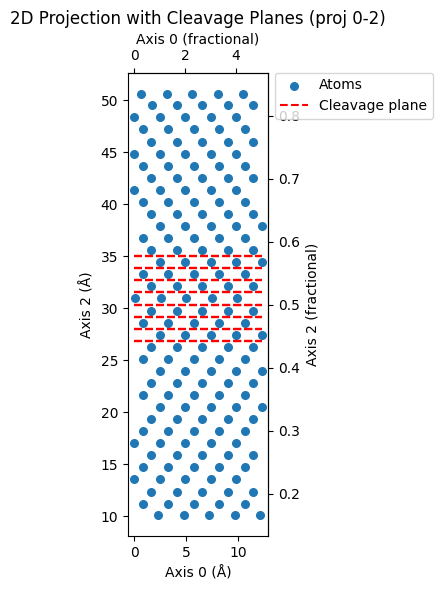

In [11]:
wf1.failed = False
try:
    wf1.remove_child("cleave_setup")
except:
    pass
try:
    wf1.remove_child("cleavage_structure_plot")
except:
    pass
input_cleave_gb_structure = CleaveGBStructureInput()
input_plot_cleave = PlotCleaveInput()
from pyiron_workflow_atomistics.gb.cleavage import cleave_gb_structure, plot_structure_with_cleavage
structure = wf1.gb_study.outputs.pure_grain_boundary_structure_vacuum.value
wf1.cleave_setup = cleave_gb_structure(
        base_structure=wf1.gb_study.outputs.pure_grain_boundary_structure_vacuum,
        axis_to_cleave=input_cleave_gb_structure.axis_to_cleave,
        target_coord=wf1.gb_study.outputs.gb_plane_analysis_dict["gb_cart"],
        tol=input_cleave_gb_structure.tol,
        cleave_region_halflength=input_cleave_gb_structure.cleave_region_halflength,
        layer_tolerance=input_cleave_gb_structure.layer_tolerance,
        separation=input_cleave_gb_structure.separation,
        use_fractional=input_cleave_gb_structure.use_fractional,
    )
wf1.cleavage_structure_plot = plot_structure_with_cleavage(
        structure=wf1.gb_study.outputs.pure_grain_boundary_structure_vacuum,
        cleavage_planes=wf1.cleave_setup.outputs.cleavage_plane_coords,
        projection=input_plot_cleave.projection,
        reps=input_plot_cleave.reps,
        figsize=input_plot_cleave.figsize,
        atom_color=input_plot_cleave.atom_color,
        plane_color=input_plot_cleave.plane_color,
        plane_linestyle=input_plot_cleave.plane_linestyle,
        atom_size=input_plot_cleave.atom_size,
        save_path=input_plot_cleave.save_path,
        dpi=input_plot_cleave.dpi,
        show_fractional_axes=input_plot_cleave.show_fractional_axes,
        ylims=input_plot_cleave.ylims,
    )
wf1.run()

EngineInput type: <class 'pyiron_workflow_atomistics.dataclass_storage.CalcInputStatic'>
mode set to  static
current mode  static
gb_cleavage_engine


2025-07-28 02:13:24,922 - pyiron_log - WARNING - Directory 'gb_cleavage_engine/gb_cleavage_engine_cp_35.04' already exists. Existing files may be overwritten.
/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized quantity
  warnings.warn(
2025-07-28 02:13:38,141 - pyiron_log - WARNING - Directory 'gb_cleavage_engine/gb_cleavage_engine_cp_33.881' already exists. Existing files may be overwritten.
/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized quantity
  warnings.warn(
2025-07-28 02:13:44,765 - pyiron_log - WARNING - Directory 'gb_cleavage_engine/gb_cleavage_engine_cp_32.724' already exists. Existing files may be overwritten.
/root/min

{'opt_cubic_cell__equil_struct': Atoms(symbols='Fe2', pbc=True, cell=[2.8281319270161314, 2.8281319270161314, 2.8281319270161314], initial_magmoms=...),
 'opt_cubic_cell__B': 174.6511086675907,
 'opt_cubic_cell__volumes': [21.287097162601995,
  21.81268105404494,
  22.346845717919777,
  22.889660634165235,
  23.441195282719992,
  24.001519143522813],
 'opt_cubic_cell__structures': [Atoms(symbols='Fe2', pbc=True, cell=[[2.77144, 1.6970175625144705e-16, 1.6970175625144705e-16], [0.0, 2.77144, 1.6970175625144705e-16], [0.0, 0.0, 2.77144]]),
  Atoms(symbols='Fe2', pbc=True, cell=[[2.794064, 1.7108707671064253e-16, 1.7108707671064253e-16], [0.0, 2.794064, 1.7108707671064253e-16], [0.0, 0.0, 2.794064]]),
  Atoms(symbols='Fe2', pbc=True, cell=[[2.816688, 1.72472397169838e-16, 1.72472397169838e-16], [0.0, 2.816688, 1.72472397169838e-16], [0.0, 0.0, 2.816688]]),
  Atoms(symbols='Fe2', pbc=True, cell=[[2.839312, 1.7385771762903346e-16, 1.7385771762903346e-16], [0.0, 2.839312, 1.7385771762903348e

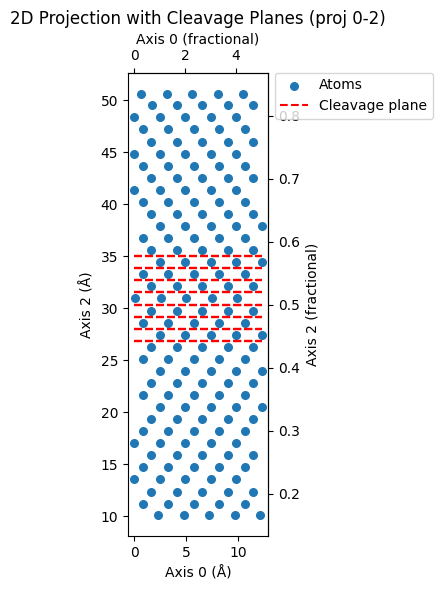

In [52]:
wf1.failed = False
try:
    wf1.remove_child("calc_cleavage_rigid")
except:
    pass
try:
    wf1.remove_child("calc_cleavage_relax")
except:
    pass
from pyiron_workflow_atomistics.gb.cleavage import calc_cleavage_GB
from pyiron_workflow_atomistics.gb.dataclass_storage import CleaveGBStructureInput, PlotCleaveInput
from pyiron_workflow_atomistics.dataclass_storage import CalcInputStatic

gb_cleavage_engine = LammpsEngine(EngineInput=CalcInputStatic())

gb_cleavage_engine.working_directory = "gb_cleavage_engine"
gb_cleavage_engine.command = "/root/github_dev/lammps/build/lmp -in in.lmp -log minimize.log"
gb_cleavage_engine.lammps_log_filepath = "minimize.log"
gb_cleavage_engine.path_to_model = "/root/github_dev/test_workflow_nodes/2025_04_29_FeGB_Segregation_Workflows/final_model"
gb_cleavage_engine.input_script_relax_pressure = 1e4
gb_cleavage_engine.input_script_relax_vmax = 0.001

CGB_StructureInput = CleaveGBStructureInput()
CGB_StructureInput.cleavage_target_coord = wf1.gb_study.outputs.gb_plane_analysis_dict.value["gb_cart"]
wf1.calc_cleavage_rigid = calc_cleavage_GB(structure=wf1.gb_study.outputs.pure_grain_boundary_structure_vacuum,
                                        energy = wf1.gb_study.outputs.pure_grain_boundary_structure_vacuum_energy,
                                        calculation_engine = gb_cleavage_engine,
                                        input_cleave_gb_structure = CGB_StructureInput,
                                        input_plot_cleave = PlotCleaveInput())


wf1.run()

EngineInput type: <class 'pyiron_workflow_atomistics.dataclass_storage.CalcInputStatic'>
mode set to  static
current mode  static
gb_cleavage_engine_static
EngineInput type: <class 'pyiron_workflow_atomistics.dataclass_storage.CalcInputMinimize'>
mode set to  minimize
current mode  minimize
gb_cleavage_engine
gb_cleavage_engine_static/cleavage_rigid


/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized quantity
  warnings.warn(
/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized quantity
  warnings.warn(
/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized quantity
  warnings.warn(
/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized qu

gb_cleavage_engine/cleavage_relax


/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized quantity
  warnings.warn(
/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized quantity
  warnings.warn(
/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized quantity
  warnings.warn(
/root/miniconda3/envs/pyiron_workflow_atomistics/lib/python3.13/site-packages/pyiron_lammps/units.py:236: UserWarning: Warning: Couldn't determine the LAMMPS to pyiron unit conversion type of quantity eng. Returning un-normalized qu

{'opt_cubic_cell__equil_struct': Atoms(symbols='Fe2', pbc=True, cell=[2.8281319270161314, 2.8281319270161314, 2.8281319270161314], initial_magmoms=...),
 'opt_cubic_cell__B': 174.6511086675907,
 'opt_cubic_cell__volumes': [21.287097162601995,
  21.81268105404494,
  22.346845717919777,
  22.889660634165235,
  23.441195282719992,
  24.001519143522813],
 'opt_cubic_cell__structures': [Atoms(symbols='Fe2', pbc=True, cell=[[2.77144, 1.6970175625144705e-16, 1.6970175625144705e-16], [0.0, 2.77144, 1.6970175625144705e-16], [0.0, 0.0, 2.77144]]),
  Atoms(symbols='Fe2', pbc=True, cell=[[2.794064, 1.7108707671064253e-16, 1.7108707671064253e-16], [0.0, 2.794064, 1.7108707671064253e-16], [0.0, 0.0, 2.794064]]),
  Atoms(symbols='Fe2', pbc=True, cell=[[2.816688, 1.72472397169838e-16, 1.72472397169838e-16], [0.0, 2.816688, 1.72472397169838e-16], [0.0, 0.0, 2.816688]]),
  Atoms(symbols='Fe2', pbc=True, cell=[[2.839312, 1.7385771762903346e-16, 1.7385771762903346e-16], [0.0, 2.839312, 1.7385771762903348e

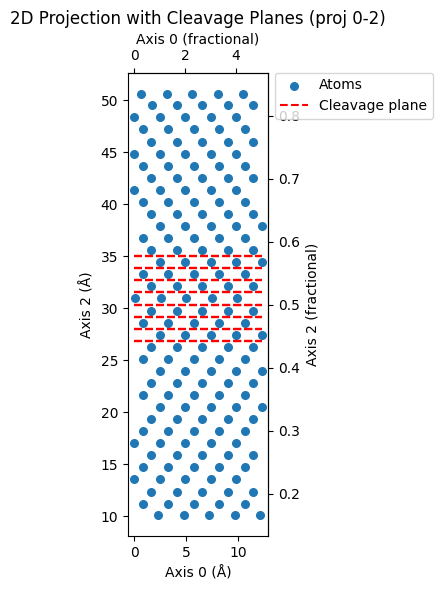

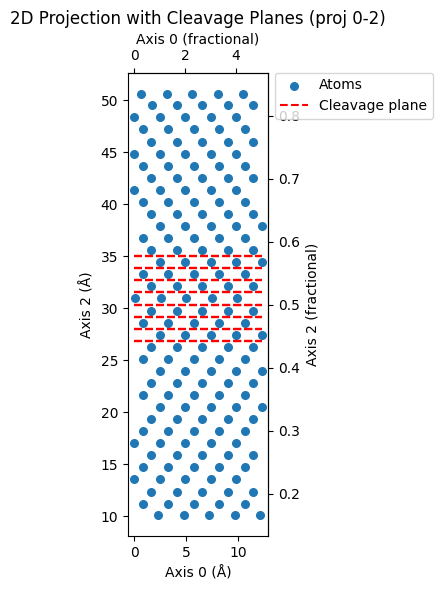

In [64]:
gb_cleavage_engine_static = LammpsEngine(EngineInput=CalcInputStatic())
gb_cleavage_engine_static.working_directory = "gb_cleavage_engine_static"
gb_cleavage_engine_static.command = "/root/github_dev/lammps/build/lmp -in in.lmp -log static.log"
gb_cleavage_engine_static.lammps_log_filepath = "static.log"
gb_cleavage_engine_static.path_to_model = "/root/github_dev/test_workflow_nodes/2025_04_29_FeGB_Segregation_Workflows/final_model"


gb_cleavage_engine = LammpsEngine(EngineInput=CalcInputMinimize())
gb_cleavage_engine.working_directory = "gb_cleavage_engine"
gb_cleavage_engine.command = "/root/github_dev/lammps/build/lmp -in in.lmp -log minimize.log"
gb_cleavage_engine.lammps_log_filepath = "minimize.log"
gb_cleavage_engine.path_to_model = "/root/github_dev/test_workflow_nodes/2025_04_29_FeGB_Segregation_Workflows/final_model"

try:
    wf1.remove_child("cleavage_study")
except:
    pass
wf1.failed = False
wf1.cleavage_study = cleavage_study(
                   gb_structure = wf1.gb_study.outputs.pure_grain_boundary_structure_vacuum,
                   gb_structure_energy = wf1.gb_study.outputs.pure_grain_boundary_structure_vacuum_energy,
                   gb_plane_cart_loc = wf1.gb_study.outputs.gb_plane_analysis_dict["gb_cart"],
                   calculation_engine = gb_cleavage_engine,
                   static_engine = gb_cleavage_engine_static,
                   CleaveGBStructure_Input = CGB_StructureInput,
                   PlotCleave_Input = PlotCleaveInput(),
                   )
wf1.run()

In [33]:
wf1.calc_cleavage_rigid.outputs.to_value_dict()["cleavage_calcs_df"]

,cleavage_coord,initial_structure,final_structure,energy,cleavage_energy
0,26.815259,"(Atom('Fe', [2.316678351334748, 3.999580865796...","(Atom('Fe', [2.316678351334748, 3.999580865796...",-289.901467,5.230188
1,27.974288,"(Atom('Fe', [2.316678351334748, 3.999580865796...","(Atom('Fe', [2.316678351334748, 3.999580865796...",-289.907397,5.220488
2,29.130386,"(Atom('Fe', [2.316678351334748, 3.999580865796...","(Atom('Fe', [2.316678351334748, 3.999580865796...",-289.974592,5.110587
3,30.316742,"(Atom('Fe', [2.316678351334748, 3.999580865796...","(Atom('Fe', [2.316678351334748, 3.999580865796...",-290.149311,4.824823
4,31.537968,"(Atom('Fe', [2.316678351334748, 3.999580865796...","(Atom('Fe', [2.316678351334748, 3.999580865796...",-290.149419,4.824647
5,32.724442,"(Atom('Fe', [2.316678351334748, 3.999580865796...","(Atom('Fe', [2.316678351334748, 3.999580865796...",-289.974381,5.110932
6,33.880754,"(Atom('Fe', [2.316678351334748, 3.999580865796...","(Atom('Fe', [2.316678351334748, 3.999580865796...",-289.907343,5.220577
7,35.040153,"(Atom('Fe', [2.316678351334748, 3.999580865796...","(Atom('Fe', [2.316678351334748, 3.999580865796...",-289.901226,5.230582
